# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
<b>Нужно научиться определять рыночную стоимость объектов недвижимости.</b>  
Ваша задача — установить параметры.  
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

### Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import MultipleLocator

data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Некоторые названия столбцов стоит переименовать.

### Переименуем столбцы

• `cityCenters_nearest` в `distance_city_center` (более понятное обозначение расстояния до центра города)
• `parks_around3000` в `parks_around_3km`
• `ponds_around3000` в `ponds_around_3km`

In [4]:
data = data.rename(columns={
    'cityCenters_nearest': 'distance_city_center',
    'airports_nearest': 'distance_airport',
    'parks_around3000': 'parks_around_3km',
    'ponds_around3000': 'ponds_around_3km',
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
distance_airport        18157 non-null float64
distance_city_center    18180 non-null float64
parks_around_3km        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_3k

В таблице двадцать два столбца.<br>
Согласно документации к данным с учётом исправленных названий столбцов:

* `distance_airport` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `distance_city_center` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around_3km` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around_3km` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Описание данных

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,distance_airport,distance_city_center,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


***
### Вывод

* В каждой строке таблицы — данные о одной квартире.  
   Всего строк — 23699.
* В колонках `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `distance_airport`, `distance_city_center`, `parks_around_3km`, `parks_nearest`, `ponds_around_3km`, `ponds_nearest`, `days_exposition` есть пропуски.  
   Особенно много в столбце `is_apartment`.
* Есть путаница с типами данных.
* Есть аномальные значения в столбцах:  
   `rooms` (0);  
   `ceiling_height` (1, 100);  
   `total_area` (900);  
   `floors_total` (60);  
   `living_area` (2);  
   `kitchen_area` (1.3, 112);  
   `distance_airport` (0);  
   `distance_city_center` (65968)<br><br>
***

## Предобработка данных

### Обработка пропусков

In [6]:
display(data.isna().sum())
ratio_na = data.isna().sum().sum() / (len(data) * len(data.columns))
print('Процент пропусков: {:.0%}'.format(ratio_na))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
distance_airport         5542
distance_city_center     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Процент пропусков: 19%


#### Столбец `locality_name`
Данные в столбце с локацией квартир крайне важны для исследования.  
Восстановить данные по другим колонкам не предстваляется возможным.  
Так как пропусков всего 49 (0,2%), можно удалить строки с пропусками в этом столбце без потерь для исследования.  

In [7]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
nan = data['locality_name'].isna().sum()
if not nan:
    print('Пропусков в столбце `locality_name` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `locality_name`:', nan)

Пропусков в столбце `locality_name` не осталось


#### Столбец `ceiling_height`
Судя по описанию данных, значения высоты потолков находятся в диапозоне 2,5–2,8 м.  
Значения выглядят правдоподобными.  
Данные в столбце с высотой потолков можно заполнить медианными значениями.  

In [8]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
ceiling_height_na = data['ceiling_height'].isna().sum()
if not ceiling_height_na:
    print('Пропусков в столбце `ceiling_height` не осталось.')
else:
    print('Пропуски в столбце `ceiling_height` всё ещё остались.')

Пропусков в столбце `ceiling_height` не осталось.


#### Столбец `floors_total`
Этажность нам потребуется для дальнейшего анализа, поэтому пропуски важно исправить.  
Данные в колонке никак не связаны с другими, заполнить пропуски логически не получится.  
Сначала проверим вызывающие сомнения данные: аномально высокие дома.  

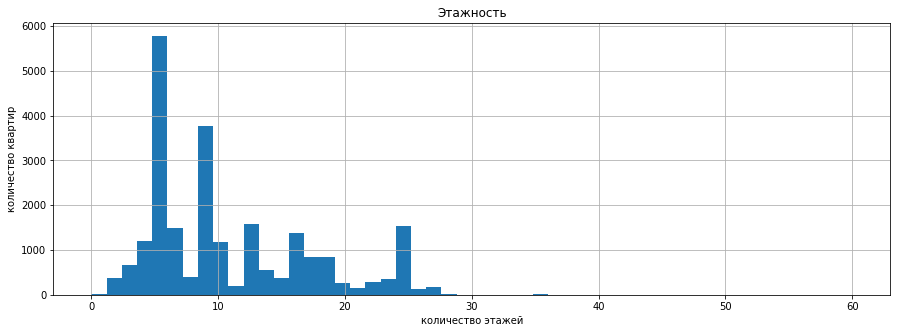

In [9]:
data['floors_total'].hist(bins=50, range=(0, 60), figsize=(15, 5)) 
plt.title("Этажность")
plt.ylabel("количество квартир")
plt.xlabel("количество этажей")
plt.show()

Распределение выглядит правдоподобно: больше всего пятиэтажек и девятиэтажных домов.

In [10]:
data[['floors_total', 'locality_name']].query('floors_total > 35')

,floors_total,locality_name
397,36.0,Санкт-Петербург
2251,60.0,Кронштадт
5797,36.0,Санкт-Петербург
11061,36.0,Санкт-Петербург
16701,52.0,Санкт-Петербург
16904,37.0,Санкт-Петербург


Самое высокое здание в Санкт-Петербурге — «Лахта-центр» — имеет 88 этажей.  
Поэтому можно допустить большое количество этажей в домах СПб,  
но в Кронштадте не может быть здание высотой 60 этажей.  

Вероятнее всего, тут опечатка: поставили лишний ноль, всего этажей шесть.  
Поправим ошибку.

In [11]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 6
data[['floors_total', 'locality_name']].query('floors_total > 35')

,floors_total,locality_name
397,36.0,Санкт-Петербург
5797,36.0,Санкт-Петербург
11061,36.0,Санкт-Петербург
16701,52.0,Санкт-Петербург
16904,37.0,Санкт-Петербург


Сгруппируем данные по локации (`locality_name`), а после заполним количество этажей (`floors_total`) медианным значением каждой группы.<br>

In [12]:
group = data.groupby(['locality_name'])
data['floors_total'] = group.floors_total.apply(lambda x: x.fillna(x.median()))
nan = data['floors_total'].isna().sum()
if not nan:
    print('Пропусков в столбце `floors_total` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `floors_total`:', nan)

Пропусков в столбце `floors_total` не осталось


#### Столбец `living_area`
Проверим, можно ли использовать связь между общей площадью квартир и жилой площадью для заполнения пропусков.  
Для этого построим диаграмму зависимости.

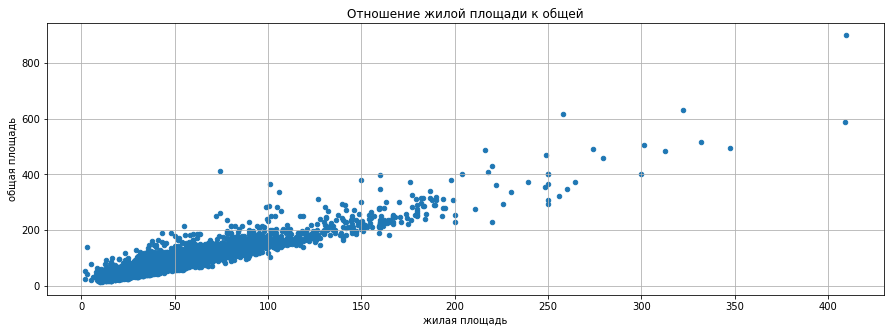

Корреляция между общей и жилой площадью: 94.0%


In [13]:
data.plot(x='living_area', y='total_area', kind='scatter', grid=True, figsize=(15, 5))
plt.title("Отношение жилой площади к общей")
plt.ylabel("общая площадь")
plt.xlabel("жилая площадь")
plt.show()
print('Корреляция между общей и жилой площадью: {:.1%}'.format(data['living_area'].corr(data['total_area'])))

По графику и коэффициенту корреляции Пирсона видно, что связь чёткая и линейная.  
Следовательно, можно использовать данные колонки `total_area` можно использовать для заполнения пропусков в `living_area`.  

In [14]:
living_area_mean = (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(round((data['total_area'] * living_area_mean), 2))
nan = data['living_area'].isna().sum()
if not nan:
    print('Пропусков в столбце `living_area` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `living_area`:', nan)

Пропусков в столбце `living_area` не осталось


#### Столбец `is_apartment`
Столбец содержит булевые данные, заменим пропуски на False.

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False)
nan = data['is_apartment'].isna().sum()
if not nan:
    print('Пропусков в столбце `is_apartment` не осталось')
else:
    print('Всё ещё остались пропуски в стобце `is_apartment`:', nan)

Пропусков в столбце `is_apartment` не осталось


#### Столбец `kitchen_area`
Проверим, можно ли использовать связь между общей площадью квартир и площадью кухни для заполнения пропусков.  
Для этого построим диаграмму зависимости.  

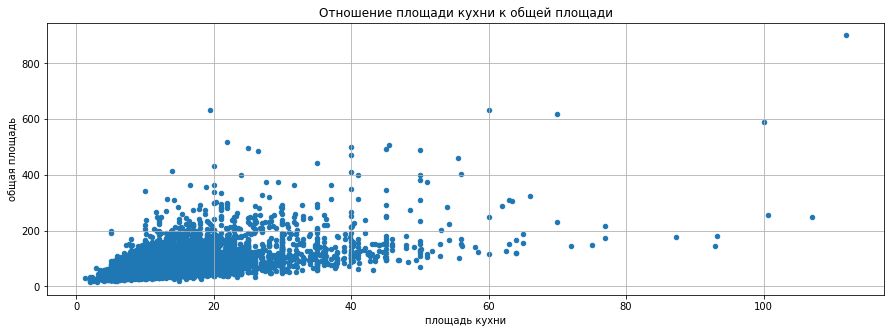

Корреляция между площадью кухни и общей площади: 60.9%


In [16]:
data.plot(x='kitchen_area', y='total_area', kind='scatter', grid=True, figsize=(15, 5))
plt.title("Отношение площади кухни к общей площади")
plt.ylabel("общая площадь")
plt.xlabel("площадь кухни")
plt.show()
print('Корреляция между площадью кухни и общей площади: {:.1%}'.format(data['kitchen_area'].corr(data['total_area'])))

Связь между двумя столбцами не такая линейная, как в случае с жилой площадью.  
Тем не менее связь просматривается.  
Восстановим пропуски в строках с площадью кухни.  

In [17]:
kitchen_area_mean = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(round((data['total_area'] * kitchen_area_mean), 2))
nan = data['kitchen_area'].isna().sum()
if not nan:
    print('Пропусков в столбце `kitchen_area` не осталось')
else:
    print('Всё ещё остались пропуски в стобце `kitchen_area`:', nan)

Пропусков в столбце `kitchen_area` не осталось


#### Столбец `balcony`
Как упоминалось в описании задания, пропуски вероятнее всего вызваны тем, что собственники квартир, в которых нет балконов, не заполняли данные по количеству балконов.  
Заполним пропуски нулями.  

In [18]:
data['balcony'] = data['balcony'].fillna(0) 
nan = data['balcony'].isna().sum()
if not nan:
    print('Пропусков в столбце `balcony` не осталось')
else:
    print('Всё ещё остались пропуски в стобце `balcony`:', nan)

Пропусков в столбце `balcony` не осталось


#### Столбец `distance_airport`
Данные столбца связаны с локацией, сгруппируем данные по локации (`locality_name`), а после заполним дистанцию до ближайшего аэропорта (`distance_airport`) медианным значением каждой группы.  
Параллельно для замены данных поменяем тип данных колонки на `int`.  

In [19]:
group = data.groupby(['locality_name'])
data['distance_airport'] = data['distance_airport'].fillna(0)
data['distance_airport'] = data['distance_airport'].astype('int')
data['distance_airport'] = group.distance_airport.apply(lambda x: x.fillna(x.median()))
nan = data['distance_airport'].isna().sum()
if not nan:
    print('Пропусков в столбце `distance_airport` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `distance_airport`:', nan)

Пропусков в столбце `distance_airport` не осталось


#### Столбец `distance_city_center`
Данные столбца нужны для выполнения одной из задач.  
При этом чёткой зависимости между другими данными не прослеживается, нет ясной логики по замене пропусков.  
Проверим, возможно расстояние до центра заполняется в Санкт-Петербурге и не заполняется в более малых городах.  

In [20]:
print('Пропуски в столбце `distance_city_center` для Санкт-Петербурга: {} из {}'.format(
    data.query('locality_name == "Санкт-Петербург"')['distance_city_center'].isna().sum(), 
    data.query('locality_name == "Санкт-Петербург"')['last_price'].count()
))
print('Пропуски в столбце `distance_city_center` для других городов: {} из {}'.format( 
    data.query('locality_name != "Санкт-Петербург"')['distance_city_center'].isna().sum(), 
    data.query('locality_name != "Санкт-Петербург"')['last_price'].count()
))
print('Процент пропусков в столбце `distance_city_center`: {:.2%}'.format( 
    data['distance_city_center'].isna().sum() / len(data)
))
data['distance_city_center'] = data['distance_city_center'].fillna(0)

Пропуски в столбце `distance_city_center` для Санкт-Петербурга: 61 из 15721
Пропуски в столбце `distance_city_center` для других городов: 5450 из 7929
Процент пропусков в столбце `distance_city_center`: 23.30%


Предположение не оправдалось в более малых городах также заполняется расстояние до центра города.  
Довольно большой процент пропусков, просто удалить строки с пропусками кажется не лучшим решением.  
Пока что заменим на нули.  

#### Столбец `parks_around_3km`
В данном столбце можно заменить данные на нули.  
Есть вероятность, что пропуски вызваны тем, что в районе трёх километров нет парков.  

In [21]:
data['parks_around_3km'] = data['parks_around_3km'].fillna(0)
nan = data['parks_around_3km'].isna().sum()
if not nan:
    print('Пропусков в столбце `parks_around_3km` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `parks_around_3km`:', nan)

Пропусков в столбце `parks_around_3km` не осталось


#### Столбец `parks_nearest`
В данном столбце можно заменить данные на нули.  
Но проверим, если столбец `parks_around_3km` заполнен, а в колонке `parks_nearest` нет данных,  
можно скопировать расстояние до ближайшего парка.  

In [22]:
print('Количество строк у которых заполнен столбец `parks_around_3km`, а в колонке `parks_nearest` нет данных: {}'.format(
    data.query('(parks_around_3km != 0) and (parks_nearest.isna())')['last_price'].count()
))

Количество строк у которых заполнен столбец `parks_around_3km`, а в колонке `parks_nearest` нет данных: 0


Проверка показала, что не получистся поправить даже часть данных на основе столбца `parks_around_3km`.

In [23]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
nan = data['parks_nearest'].isna().sum()
if not nan:
    print('Пропусков в столбце `parks_nearest` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `parks_nearest`:', nan)

Пропусков в столбце `parks_nearest` не осталось


#### Столбец `ponds_around_3km`
В данном столбце можно заменить данные на нули.  
Есть вероятность, что пропуски вызваны тем, что в районе трёх километров нет водоёмов.  

In [24]:
data['ponds_around_3km'] = data['ponds_around_3km'].fillna(0)
nan = data['ponds_around_3km'].isna().sum()
if not nan:
    print('Пропусков в столбце `ponds_around_3km` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `ponds_around_3km`:', nan)

Пропусков в столбце `ponds_around_3km` не осталось


#### Столбец `ponds_nearest`
В данном столбце можно заменить данные на нули.  
Но проверим, если столбец `ponds_around_3km` заполнен, а в колонке `ponds_nearest` нет данных,  
можно скопировать расстояние до ближайшего парка.  

In [25]:
print('Количество строк у которых заполнен столбец `ponds_around_3km`, а в колонке `ponds_nearest` нет данных: {}'.format(
    data.query('(ponds_around_3km != 0) and (ponds_nearest.isna())')['last_price'].count()
))

Количество строк у которых заполнен столбец `ponds_around_3km`, а в колонке `ponds_nearest` нет данных: 0


Проверка показала, что не получистся поправить даже часть данных на основе столбца `ponds_around_3km`.

In [26]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
nan = data['ponds_nearest'].isna().sum()
if not nan:
    print('Пропусков в столбце `ponds_nearest` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `ponds_nearest`:', nan)

Пропусков в столбце `ponds_nearest` не осталось


#### Столбец `days_exposition`
Данные в столбце невозоможно восстановить по другим колонкам.  
Предварительно заполним пропуски нулями.  

In [27]:
data['days_exposition'] = data['days_exposition'].fillna(0)
nan = data['days_exposition'].isna().sum()
if not nan:
    print('Пропусков в столбце `days_exposition` не осталось')
else:
    print('Всё ещё остались пропуски в столбце `days_exposition`:', nan)

Пропусков в столбце `days_exposition` не осталось


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
distance_airport        23650 non-null int64
distance_city_center    23650 non-null float64
parks_around_3km        23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around_3km 

***
#### Вывод

Поправили все пропуски кроме колонки `distance_city_center`.  
В процессе удалили 49 строк.  
Всё ещё остались проблемы с типами данных и аномальными значениями в некоторых столбцах.<br><br>
***

### Замена типа данных

* **Столбец `is_apartment`.<br>**
    Заменим object на bool.

In [29]:
data['is_apartment'] = data['is_apartment'].astype('bool')

* **Столбец `days_exposition`.<br>**
    Заменим float64 на int.

In [30]:
data['days_exposition'] = data['days_exposition'].astype('int')

* **Столбец `floors_total`.<br>**
    Заменим float64 на int.

In [31]:
data['floors_total'] = data['floors_total'].astype('int')

* **Столбец `balcony`.<br>**
    Заменим float64 на int.

In [32]:
data['balcony'] = data['balcony'].astype('int')

* **Столбец `distance_city_center`.<br>**
    Заменим float64 на int.

In [33]:
data['distance_city_center'] = data['distance_city_center'].astype('int')

* **Столбец `open_plan`.<br>**
    Заменим object на bool.

In [34]:
data['open_plan'] = data['open_plan'].astype('bool')

* **Столбец `last_price`.<br>**
    Заменим float64 на int.  
    Точность до копеек не требуется.  

In [35]:
data['last_price'] = data['last_price'].astype('int')

* **Столбец `first_day_exposition`.<br>**
    Заменим object на datetime64.<br>

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
distance_airport        23650 non-null int64
distance_city_center    23650 non-null int64
parks_around_3km        23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around_3km 

***
#### Вывод

Исправлены ошибки в типах данных.<br><br>
***

### Обработка опечаток

#### Столбец `locality_name`
Переведём данные в нижний регистр и заменим букву «ё» на «е».<br>

In [38]:
print('Количество уникальных значений в столбце `locality_name` до правок:', len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
print('Количество уникальных значений в столбце `locality_name` после правок:', len(data['locality_name'].unique()))

Количество уникальных значений в столбце `locality_name` до правок: 364
Количество уникальных значений в столбце `locality_name` после правок: 330


In [39]:
data.loc[data['locality_name'] == 'мурино', 'locality_name'] = 'поселок мурино'
data.loc[data['locality_name'] == 'кудрино', 'locality_name'] = 'поселок кудрино'

Поправили дубликаты для послеления «посёлок Мурино».  
Поправили дубликаты для послеления «посёлок Кудрино».  
Так как в больших данных могут встречаться поселения,  
которые назвыются похоже, но фактически находятся в разных местах,  
не буду применять метод лемматизации и объединения пропусков.  
Но в частных случаях проверил и поправил вручную.  

#### Столбец `kitchen_area`
В квартирах-студиях площадь кухни должна быть равна нулю.  
Проверим, нет ли ошибочных данных.  

In [40]:
print('Количество ошибочных данных в столбце `kitchen_area`: {}'.format(
    data.query('(studio) and (kitchen_area > 0)')['last_price'].count()
))

Количество ошибочных данных в столбце `kitchen_area`: 149


Заменим ошибочные данные на нули

In [41]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

In [42]:
print('Количество ошибочных данных в столбце `kitchen_area`: {}'.format(
    data.query('(studio) and (kitchen_area > 0)')['last_price'].count()
))

Количество ошибочных данных в столбце `kitchen_area`: 0


#### Столбец `total_area`
Сумма жилой площади и площади кухни не должна превышать общую площадь.  
Проверим, нет ли ошибочных данных.  

In [43]:
print('Количество ошибочных данных в столбце `total_area`: {}'.format(
    data.query('total_area < (kitchen_area + living_area)')['last_price'].count()
))

Количество ошибочных данных в столбце `total_area`: 108


Посмотрим на ошибочные данные

In [44]:
df = data.query('total_area < (kitchen_area + living_area)')[['total_area', 'kitchen_area', 'living_area']]
df['area_difference'] = df['total_area'] - df['kitchen_area'] - df['living_area']
df.sort_values(by='area_difference', ascending=True)

,total_area,kitchen_area,living_area,area_difference
7843,230.00,43.10,220.00,-33.10
7227,90.00,43.40,76.40,-29.80
4359,47.70,28.20,39.80,-20.30
6791,69.00,25.00,64.00,-20.00
11560,33.00,26.00,26.00,-19.00
...,...,...,...,...
19869,12.00,2.25,10.00,-0.25
11161,33.00,6.18,27.06,-0.24
7666,38.80,6.00,33.00,-0.20
11962,33.95,14.97,19.17,-0.19


Нельзя сказать, что разница аномально большая.  
Заменим данные в `total_area` на сумму жилой площади и площади кухни.  

In [45]:
data.loc[data['total_area'] < (data['kitchen_area'] + data['living_area']), 'total_area'] = \
data['kitchen_area'] + data['living_area']

print('Количество ошибочных данных в столбце `total_area`: {}'.format(
    data.query('total_area < (kitchen_area + living_area)')['last_price'].count()
))

Количество ошибочных данных в столбце `total_area`: 0


#### Столбец `studio`
Столбцы `studio` и `rooms` взаимосвязаны.  
Если количество комнат равно нулю, то это студия.  
Проверю, что нет «выбивающихся данных».  

In [46]:
print('Всего таких ошибочных данных: {}'.format(data.query('(rooms == 0) & (not studio)')['last_price'].count()))
data.query('(rooms == 0) & (not studio)').head()

Всего таких ошибочных данных: 59


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,distance_airport,distance_city_center,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
349,4,2320000,25.0,2017-09-27,0,2.65,14,17.00,1,False,...,4.68,0,деревня кудрово,0,0,0.0,0.0,0.0,0.0,45
508,0,3375000,34.4,2017-03-28,0,2.65,26,24.30,19,False,...,6.45,1,поселок парголово,53115,19292,0.0,0.0,1.0,593.0,430
780,9,2600000,26.1,2018-02-20,0,2.65,18,14.74,8,False,...,4.89,1,поселок мурино,0,0,0.0,0.0,0.0,0.0,45
839,14,1900000,35.0,2017-04-14,0,2.70,5,15.00,3,False,...,6.56,1,поселок новый свет,0,0,0.0,0.0,0.0,0.0,7
946,5,2200000,23.0,2016-09-27,0,2.65,27,18.00,7,False,...,4.31,2,поселок мурино,0,0,0.0,0.0,0.0,0.0,483


По всем признакам квартиры напоминают студии.  
Сделаю замену: если количество комнат равно нулю, то это студия.  

In [47]:
data.loc[data['rooms'] == 0, 'studio'] = True
print('Осталось ошибочных данных: {}'.format(data.query('(rooms == 0) & (not studio)')['last_price'].count()))

Осталось ошибочных данных: 0


***
#### Вывод

Данные исправлены, можно приступать к расчётам.<br><br>
***

## Расчёты и добавление результатов в таблицу

### Столбец `price_per_square`
Рассчитаем стоимость квадратного метра жилья.<br>

In [48]:
data['price_per_square'] = round(data['last_price'] / data['total_area'], 0)
data['price_per_square'] = data['price_per_square'].astype('int')
data[['last_price', 'total_area', 'price_per_square']].head()

,last_price,total_area,price_per_square
0,13000000,108.0,120370
1,3350000,40.4,82921
2,5196000,56.0,92786
3,64900000,159.0,408176
4,10000000,100.0,100000


Низкая стоимость квадратного метра жилья вызывает сомнения.  
Посмотрим на срез таких данных по Санкт-Петербургу.  

In [49]:
print('Всего квартир с низкой стоимостью:', 
     data.query('(locality_name == "санкт-петербург") and (price_per_square < 50000)')['last_price'].count())
data.query(
    '(locality_name == "санкт-петербург") and (price_per_square < 50000)'
)[['last_price', 'total_area', 'price_per_square', 'distance_city_center']].sort_values(by='price_per_square').head(10)

Всего квартир с низкой стоимостью: 22


,last_price,total_area,price_per_square,distance_city_center
8778,12190,109.0,112,9176
17722,1800000,117.3,15345,5238
19917,2200000,138.7,15862,4069
21295,3200000,190.0,16842,4312
23345,1600000,92.0,17391,4465
4241,1200000,49.1,24440,12313
13716,2100000,80.0,26250,5094
7742,4390000,151.8,28920,2270
2518,2300000,65.0,35385,14647
3321,3500000,94.0,37234,10010


Стоимость менее 50 тыс. руб. за м² и тем более ниже 10 тыс. руб. за м² в Санкт-Петербурге кажется неправдоподобной.  
При этом нельзя выявить системную ошибку в данных, пока что не будем править.  

### Столбцы `created_weekday`, `created_month`, `created_year`
Разобьём дату публикации на составляющие.

In [50]:
data['created_weekday'] = data['first_day_exposition'].dt.weekday
data['created_month'] = data['first_day_exposition'].dt.month
data['created_year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_city_center,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_square,created_weekday,created_month,created_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028,1.0,482.0,2.0,755.0,0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603,0.0,0.0,0.0,0.0,81,82921,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933,1.0,90.0,2.0,574.0,558,92786,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,89.8,9,False,...,6800,2.0,84.0,3.0,234.0,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098,2.0,112.0,1.0,48.0,121,100000,1,6,2018


### Столбец `floor_category`
Разобьём данные на категории по этажам.

In [51]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'
data[['floor', 'floors_total', 'floor_category']].loc[10:15]

,floor,floors_total,floor_category
10,3,12,другой
11,4,5,другой
12,5,5,последний
13,5,5,последний
14,1,6,первый
15,5,14,другой


### Столбцы `living_area_ratio` и `kitchen_area_ratio`
Выведем соотношение жилой и кухонной зоны к общей.

In [52]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)
data[['total_area', 'living_area', 'living_area_ratio', 'kitchen_area', 'kitchen_area_ratio']].head()

,total_area,living_area,living_area_ratio,kitchen_area,kitchen_area_ratio
0,108.0,51.0,0.47,25.00,0.23
1,40.4,18.6,0.46,11.00,0.27
2,56.0,34.3,0.61,8.30,0.15
3,159.0,89.8,0.56,29.79,0.19
4,100.0,32.0,0.32,41.00,0.41


***
### Вывод

Добавили недостающие данные, чтобы приступить к изучению.<br><br>
***

## Исследовательский анализ данных

Функция для опредления минимального и максимального нормального значения для диаграммы «ящик с усами»

In [53]:
def min_max(column):
    stat = data[column].describe()
    quartile = stat[6] - stat[4]  
    minimum = round(stat[4] - 1.5 * quartile, 2)
    maximum = round(stat[6] + 1.5 * quartile, 2)
    if minimum < stat[3]:
        minimum = stat[3] 
    if maximum > stat[7]:
        maximum = stat[7]
    return (minimum, maximum)

### Фильтрация данных

#### Параметр `площадь`

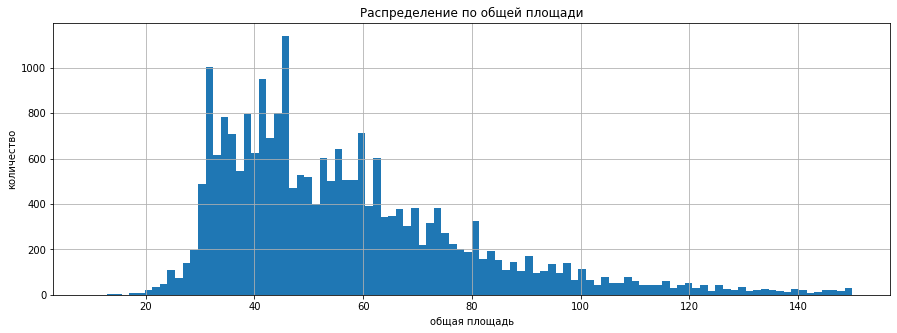

In [54]:
data['total_area'].hist(bins=100, range=(10, 150), figsize=(15, 5))
plt.title("Распределение по общей площади")
plt.ylabel("количество")
plt.xlabel("общая площадь")
plt.show()

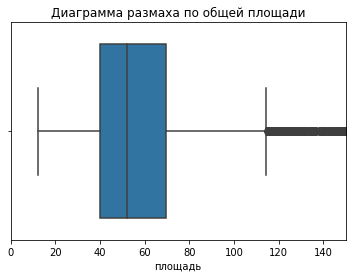

In [55]:
ax = sns.boxplot(data['total_area'], orient="h")
plt.title("Диаграмма размаха по общей площади")
plt.xlabel("площадь")
plt.xlim(0, 150)
plt.show()

По диаграмме размаха видно много «выбросов» данных: квартиры площадью более 115 м².  
Создам новый кластер данных, исключив выбросы.

In [56]:
maximum = min_max('total_area')[1]
good_data = data.copy()
good_data = data.query(f'total_area <= {maximum}')
if not good_data.query(f'total_area > {maximum}')['last_price'].count():
    print('успешно')
else:
    print('что-то пошло не так')

успешно


#### Параметр `цена`

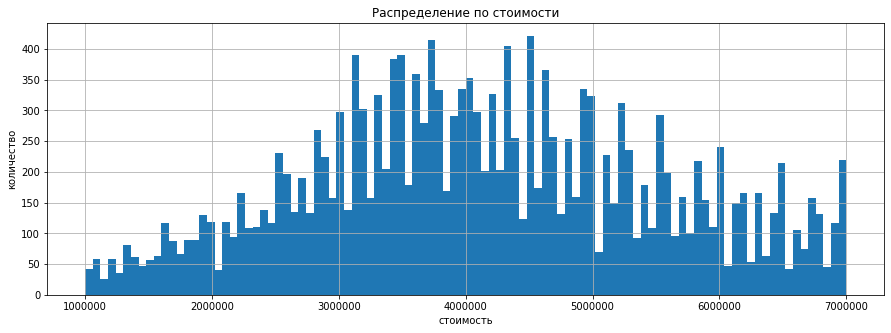

In [57]:
data['last_price'].hist(bins=100, range=(1000000, 7000000), figsize=(15, 5))
plt.title("Распределение по стоимости")
plt.ylabel("количество")
plt.xlabel("стоимость")
plt.show()

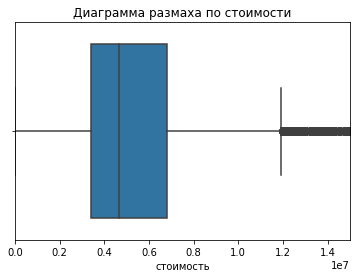

In [58]:
sns.boxplot(data['last_price'], orient="h")
plt.title("Диаграмма размаха по стоимости")
plt.xlabel("стоимость")
plt.xlim(0, 15e6)
plt.show()

По диаграмме размаха видно много «выбросов» данных: квартиры стоимостью более 12 млн.  
Обновим новый кластер данных, исключив выбросы.

In [59]:
maximum = min_max('last_price')[1]
good_data = good_data.query(f'last_price <= {maximum}')
if not good_data.query(f'last_price > {maximum}')['last_price'].count():
    print('успешно')
else:
    print('что-то пошло не так')

успешно


#### Параметр `число комнат`

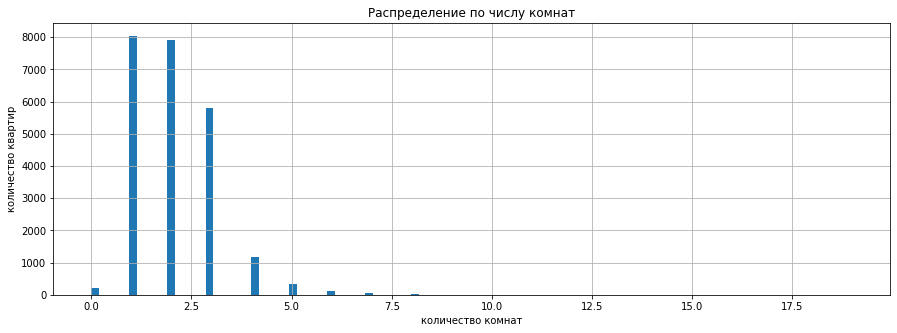

In [60]:
data['rooms'].hist(bins=100, figsize=(15, 5))
plt.title("Распределение по числу комнат")
plt.ylabel("количество квартир")
plt.xlabel("количество комнат")
plt.show()

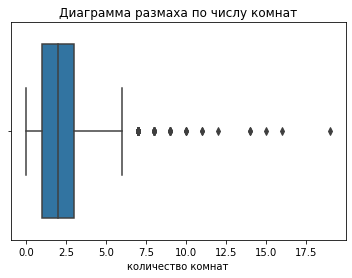

In [61]:
sns.boxplot(data['rooms'], orient="h")
plt.title("Диаграмма размаха по числу комнат")
plt.xlabel("количество комнат")
plt.show()

По диаграмме размаха видно много «выбросов» данных: квартиры, в которых более 6 комнат.  
Обновим новый кластер данных, исключив выбросы.  

In [62]:
maximum = min_max('rooms')[1]
maximum = 7
good_data = good_data.query(f'rooms <= {maximum}')
if not good_data.query(f'rooms > {maximum}')['rooms'].count():
    print('успешно')
else:
    print('что-то пошло не так')

успешно


Если убрать выбросы по количеству комнат от верхней границы теряются ценные для последующего анализа данные.  
Поэтому вручную поднял границу до 7 комнат.  

#### Параметр `высота потолков`

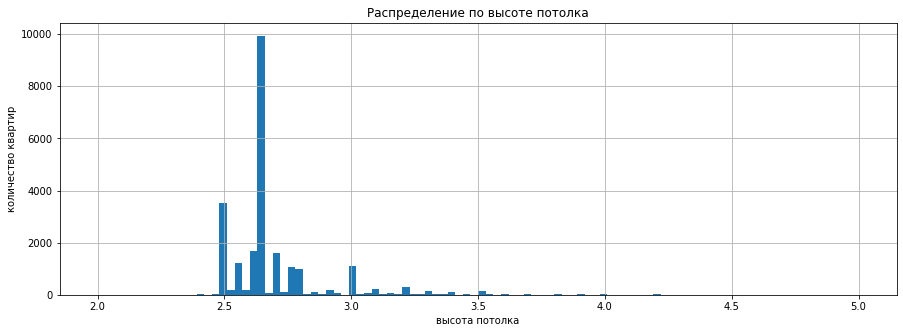

In [63]:
data['ceiling_height'].hist(bins=100, range=(2, 5), figsize=(15, 5))
plt.title("Распределение по высоте потолка")
plt.ylabel("количество квартир")
plt.xlabel("высота потолка")
plt.show()

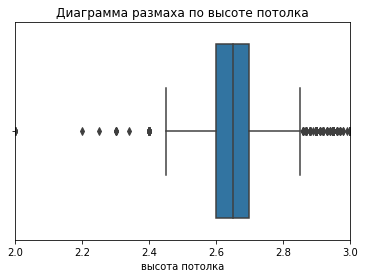

In [64]:
sns.boxplot(data['ceiling_height'], orient="h")
plt.title("Диаграмма размаха по высоте потолка")
plt.xlabel("высота потолка")
plt.xlim(2, 3)
plt.show()

По диаграмме размаха видно много «выбросов» данных: квартиры, в которых высота потолка более 6 комнат.  
Обновим новый кластер данных, исключив выбросы.  

In [65]:
minimum = min_max('ceiling_height')[0]
maximum = min_max('ceiling_height')[1]
maximum = 4
good_data = good_data.query(f'ceiling_height <= {maximum}')
if not good_data.query(f'ceiling_height > {maximum}')['ceiling_height'].count():
    print('успешно')
else:
    print('что-то пошло не так')

успешно


Если убрать выбросы по высоте потолка от верхней границы теряются ценные для последующего анализа данные.  
Поэтому вручную поднял границу до 4 м.  

### Задача 1. `«Время продажи квартиры»`.
Изучите время продажи квартиры.  
Постройте гистограмму. Посчитайте среднее и медиану.  
Опишите, сколько обычно занимает продажа.  
Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?  

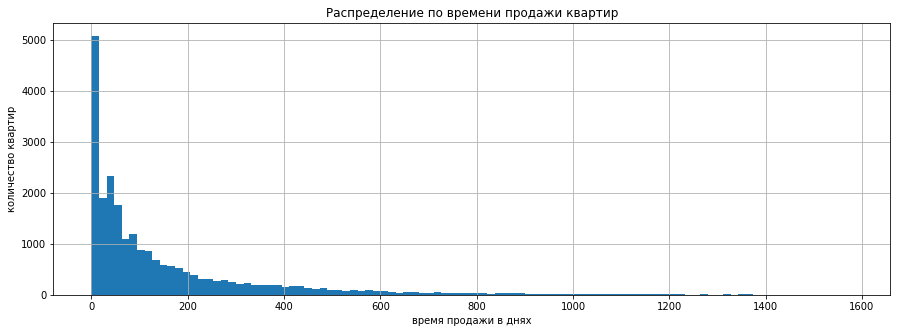

In [66]:
data['days_exposition'].hist(bins=100, figsize=(15, 5))
plt.title("Распределение по времени продажи квартир")
plt.ylabel("количество квартир")
plt.xlabel("время продажи в днях")
plt.show()

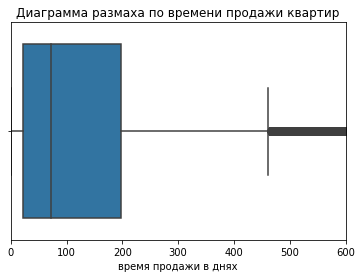

In [67]:
sns.boxplot(data['days_exposition'], orient="h")
plt.title("Диаграмма размаха по времени продажи квартир")
plt.xlabel("время продажи в днях")
plt.xlim(0, 600)
plt.show()

По диаграмме размаха видно много «выбросов» данных: квартиры, в которых время продажи более 500 дней.<br>


In [68]:
data['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Нормальное время продажи квартиры ≈ 73 дня / 2,4 месяца.  
Если удалось продать квартиру в срок до 22 дней,  
то есть вероятность, что либо цена ниже рынка, либо продавцу повезло.  
Если срок продажи квартиры более 198 дней / 6,6 месяца, что-то не так.  

Среди данных выделяется пик в районе 0 — это пропуски, которые мы до этого заполнили нулями.

### Задача 2. `Фильтрация данных. Продолжение`.
Уберите редкие и выбивающиеся значения.  
Опишите, какие особенности обнаружили.  

* **Особенности данных.<br>**
   Выше уже обработали большую часть параметров.  
   Можно выделить следующие особенности:  
   * Редко встречаются квартиры площадью более 100 м².
   * Редко встречаются квартиры с более, чем 6 комнат.
   * Редко встречаются квартиры с высотой потолка менее, чем 2,5 м.  
      Вероятнее всего это обусловлено строительными нормами.  
   * Редко встречаются квартиры с высотой потолка более 3,3 м.
   * Редко встречаются квартиры стоимостью более 12 млн руб.  
      Есть несколько десятков квартир в Санкт-Петербурге с аномлаьно низкой стоимостью.  
   * Редко встречаются квартиры, которые продавались дольше 500 дней.

Перед решением последующих задач проверим, что описание отфильтрованных данных.

In [69]:
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_per_square,created_weekday,created_month,created_year,living_area_ratio,kitchen_area_ratio
count,21366.000000,2.136600e+04,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,...,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000
mean,9.675981,4.799533e+06,52.607500,1.911074,2.668888,10.790976,30.090818,5.902041,9.456781,0.590939,...,151.043714,0.526350,190.315969,151.005289,92009.568052,2.575541,6.400309,2017.390667,0.563374,0.188335
std,5.536035,2.177703e+06,17.702746,0.888311,0.171294,6.622461,12.553720,4.911260,3.779928,0.938323,...,290.281141,0.825882,304.122573,204.887811,29531.604395,1.793631,3.490545,1.017058,0.099149,0.068919
min,0.000000,1.219000e+04,12.250000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,112.000000,0.000000,1.000000,2014.000000,0.040000,0.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,24.000000,74614.250000,1.000000,3.000000,2017.000000,0.500000,0.140000
50%,9.000000,4.400000e+06,49.000000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,71.000000,92667.000000,3.000000,6.000000,2017.000000,0.560000,0.180000
75%,14.000000,5.950000e+06,63.000000,3.000000,2.680000,16.000000,38.800000,8.000000,11.000000,1.000000,...,241.000000,1.000000,363.000000,190.750000,109323.500000,4.000000,10.000000,2018.000000,0.630000,0.230000
max,50.000000,1.189440e+07,114.500000,6.000000,4.000000,52.000000,93.600000,33.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,312240.000000,6.000000,12.000000,2019.000000,0.920000,0.720000


### Задача 3. `«Факторы ценообразования»`.
Какие факторы больше всего влияют на стоимость квартиры?  
Изучите, зависит ли цена от  
* квадратного метра (видимо, общая площадь имеется в виду), 
* числа комнат, 
* этажа (первого или последнего), 
* удалённости от центра.

Также изучите зависимость от даты размещения: дня недели, месяца и года.

Выберите 10 населённых пунктов с наибольшим числом объявлений.  
Посчитайте среднюю цену квадратного метра в этих населённых пунктах.  
Выделите населённые пункты с самой высокой и низкой стоимостью жилья.  
Эти данные можно найти по имени в столбце *'locality_name'*.  

Посторим матрицу диаграмм рассеяния

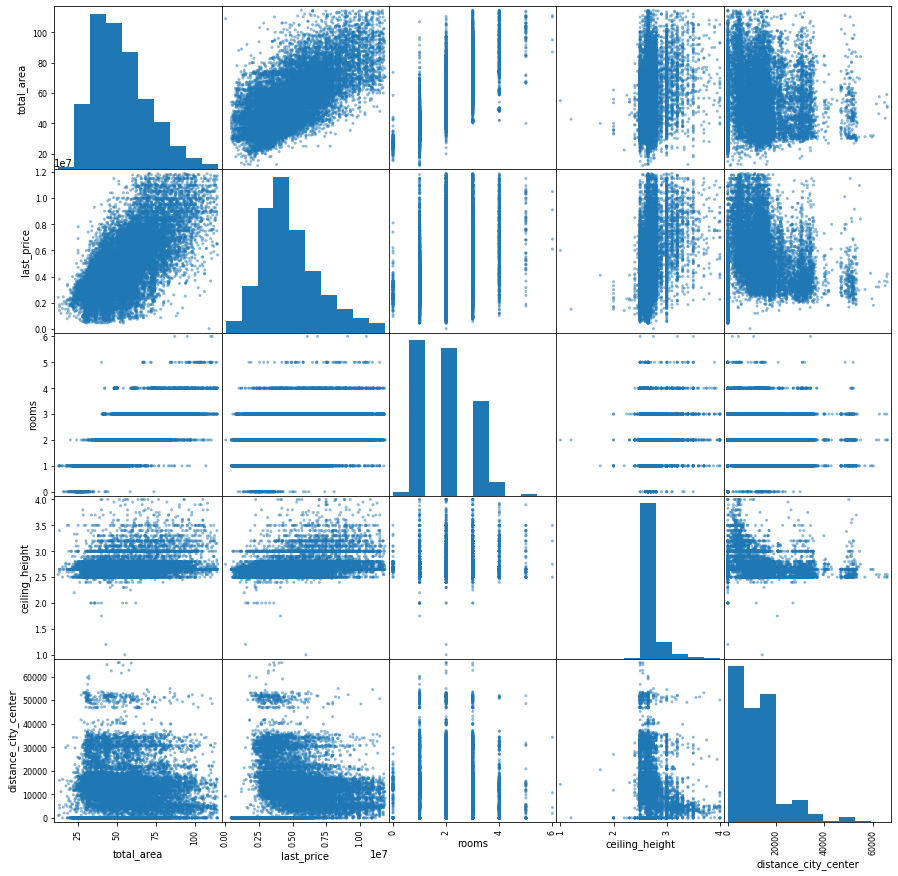

In [70]:
good_data_stats = good_data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'distance_city_center']]
pd.plotting.scatter_matrix(good_data_stats, figsize=(15, 15))
plt.show()

#### Зависимость от `total_area`

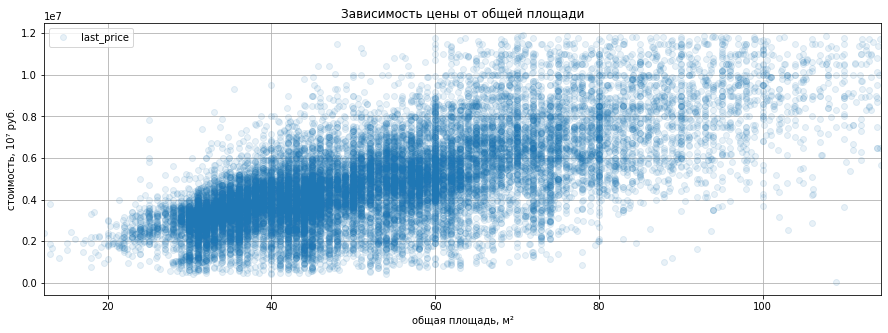

In [71]:
good_data.plot(x='total_area', y='last_price', style='o', grid=True, figsize=(15, 5), alpha=0.1)
plt.title("Зависимость цены от общей площади")
plt.xlabel("общая площадь, м²")
plt.ylabel("стоимость, 10⁷ руб.")
plt.show()

In [72]:
print('Корреляция между стоимостью и общей площадью: {:.1%}'.format(
    good_data['last_price'].corr(good_data['total_area'])))

Корреляция между стоимостью и общей площадью: 69.4%


#### Зависимость от `rooms`

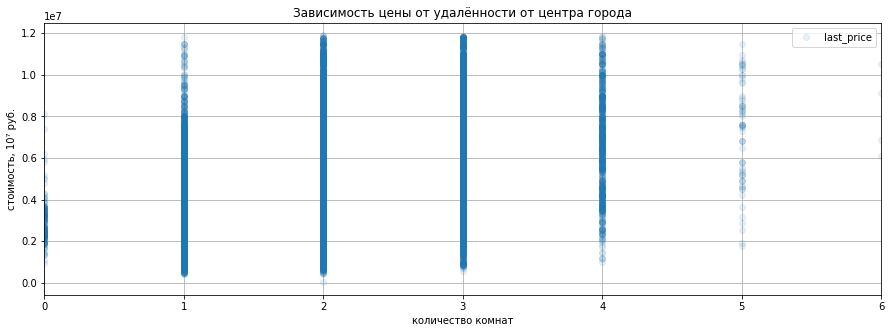

In [73]:
good_data.plot(x='rooms', y='last_price', style='o', grid=True, figsize=(15, 5), alpha=0.1)
plt.title("Зависимость цены от удалённости от центра города")
plt.xlabel("количество комнат")
plt.ylabel("стоимость, 10⁷ руб.")
plt.show()

In [74]:
print('Корреляция между стоимостью и количеством комнат: {:.1%}'.format(
    good_data['last_price'].corr(good_data['rooms'])))

Корреляция между стоимостью и количеством комнат: 43.2%


#### Зависимость от `floor_category`

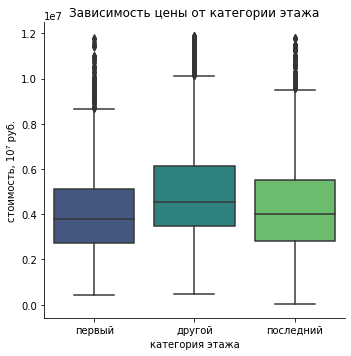

In [75]:
sns.catplot(x="floor_category", y="last_price", kind="box", data=good_data, palette='viridis')
plt.title("Зависимость цены от категории этажа")
plt.xlabel("категория этажа")
plt.ylabel("стоимость, 10⁷ руб.")
plt.show()

#### Зависимость от `distance_city_center`

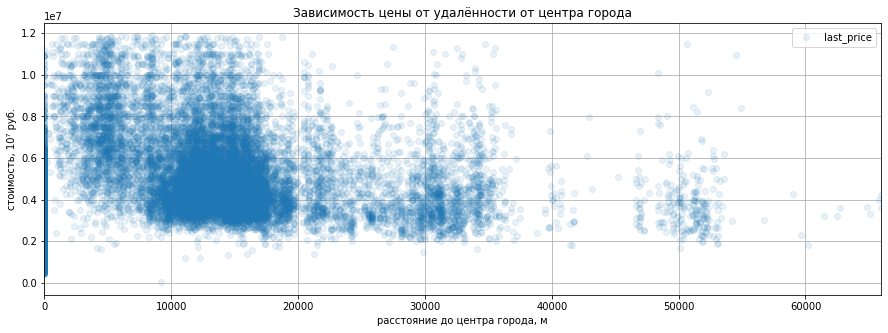

In [76]:
good_data.plot(x='distance_city_center', y='last_price', style='o', grid=True, figsize=(15, 5), alpha=0.1)
plt.title("Зависимость цены от удалённости от центра города")
plt.xlabel("расстояние до центра города, м")
plt.ylabel("стоимость, 10⁷ руб.")
plt.show()

In [77]:
print('Корреляция между стоимостью и расстоянием до центра города: {:.1%}'.format(
    good_data.query('distance_city_center != 0')['last_price'].corr(good_data['distance_city_center'])))

Корреляция между стоимостью и расстоянием до центра города: -34.5%


#### Зависимость от `created_weekday`, `created_month`,	`created_year`

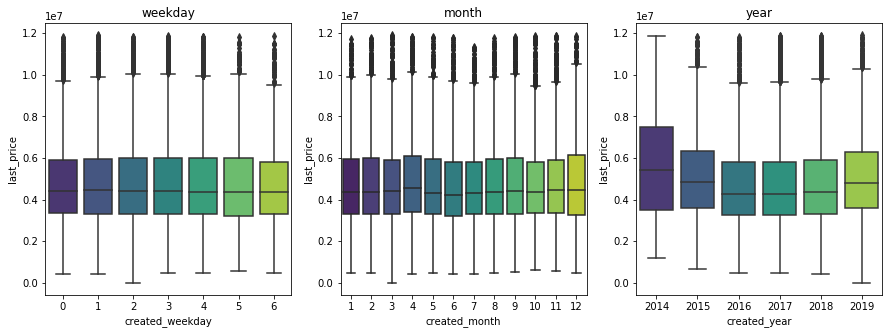

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(ax=axes[0], data=good_data, x='created_weekday', y='last_price', palette='viridis')
axes[0].set_title('weekday')
sns.boxplot(ax=axes[1], data=good_data, x='created_month', y='last_price', palette='viridis')
axes[1].set_title('month')
sns.boxplot(ax=axes[2], data=good_data, x='created_year', y='last_price', palette='viridis')
axes[2].set_title('year')
plt.show()

***
#### Промежуточные выводы
Факторы, которые влияют на стоимость квартиры:
* Наиболее явным фактором является общая площадь квартиры.  
   Чем больше площадь, тем больше стоимость.  
   Коэффициент корреляции Пирсона — 69.4%.  
* Количество комнат в квартире тоже влияет на цену, но в меньшей степени.  
   Чем больше комнат, тем больше стоимость.  
   Коэффициент корреляции Пирсона — 43,2%.  
* Квартиры на первом и последнем этаже стоят дешевле, чем другие.  
   Жильё на первом этаже стоит дешевле, чем на последнем.  
* Расстояние до центра поселения сказывается на стоимости.  
   Чем дальше от центра, тем меньше стоимость.  
   Коэффициент корреляции Пирсона — −34,5%.  
* День размещения объявления не сказывается на цене.  
* В декабре наблюдается больше размещённых объявлений, чем в другие месяцы.  
* В 2014 году можно заметить всплеск объявлений и стоимости квартир, видимо, вызванный падающим курсом рубля.  
   [Валютный кризис в России (2014—2015)](https://ru.wikipedia.org/wiki/%D0%92%D0%B0%D0%BB%D1%8E%D1%82%D0%BD%D1%8B%D0%B9_%D0%BA%D1%80%D0%B8%D0%B7%D0%B8%D1%81_%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_(2014%E2%80%942015))  
   Далее было снижение цены жилья до 2016 года и затем медленный рост вплоть до 2019 года.<br><br>
***

#### ТОП-10 поселений по количеству объявлений

In [79]:
data_pivot_locality = good_data.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count', 'median'])
data_pivot_locality.columns = ['volume', 'median']
data_pivot_locality.sort_values('volume', ascending=False).head(10)

,volume,median
locality_name,,
санкт-петербург,13574,102012.5
поселок мурино,588,86059.5
поселок шушары,437,76667.0
всеволожск,393,65789.0
колпино,335,74722.0
пушкин,335,98438.0
поселок парголово,326,91580.0
гатчина,302,67746.5
деревня кудрово,298,91831.5


Дороже всего жильё в Санкт-Петербурге.  
Дешевле всего — в Выборге.  
Отметим, что Выборг и наиболее удалён от Санкт-Петербурга по сравнению с другими поселениями.  

### Задача 4. `«Анализ центра Санкт-Петербурга»`.
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.  
Выделите квартиры в Санкт-Петербурге (*'locality_name'*).  
Ваша задача — выяснить, какая область входит в центр.  
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.  
После этого посчитайте среднюю цену для каждого километра.  
Постройте график: он должен показывать, как цена зависит от удалённости от центра.  
Определите границу, где график сильно меняется — это и будет центральная зона.  

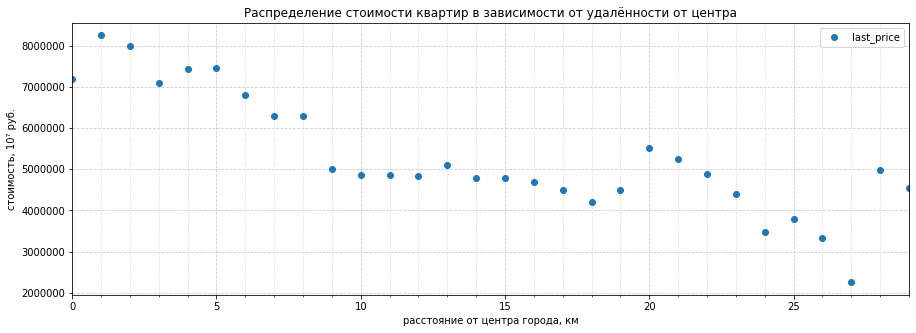

In [80]:
spb = good_data.copy()
spb = spb.query('(locality_name == "санкт-петербург") & (distance_city_center != 0)')
spb.reset_index(drop=True)
spb['center_km'] = round(spb['distance_city_center'] / 1000, 0).astype('Int64')
spb_pivot_price = spb.pivot_table(index='center_km', values='last_price', aggfunc='median')

ax = spb_pivot_price.plot(style='o', grid=True, figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.title("Распределение стоимости квартир в зависимости от удалённости от центра")
plt.xlabel("расстояние от центра города, км")
plt.ylabel("стоимость, 10⁷ руб.")
plt.show()

Можно заметить скачок цен (> 1 млн руб.) между 8 и 9 км от центра.  
Определим центральную зону в радиусе 8 км от центра.  

### Задача 5. `«Анализ центра Санкт-Петербурга»`. Продолжение 
Выделите сегмент квартир в центре.  
Проанализируйте эту территорию и изучите следующие параметры: 
* площадь, 
* цена,
* число комнат,
* высота потолков. 

Также выделите факторы, которые влияют на стоимость квартиры  
(число комнат, этаж, удалённость от центра, дата размещения объявления).  
Сделайте выводы. Отличаются ли они от общих выводов по всему городу?  

In [81]:
spb_center = spb.query('center_km <= 8')
spb_center = spb_center.reset_index(drop=True)

#### Параметр `площадь`

In [82]:
spb_center['total_area'].describe()

count    2655.000000
mean       63.342053
std        20.722769
min        12.250000
25%        46.400000
50%        61.900000
75%        77.900000
max       114.200000
Name: total_area, dtype: float64

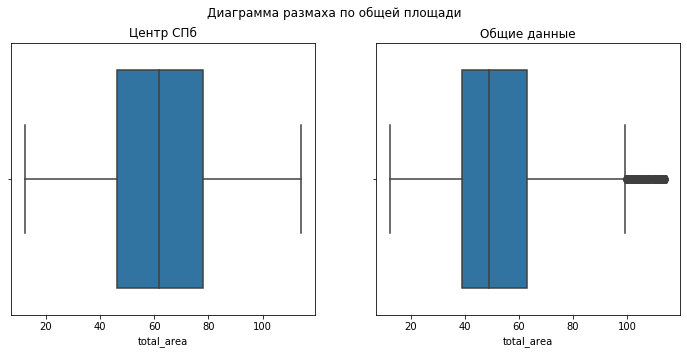

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Диаграмма размаха по общей площади')
sns.boxplot(spb_center['total_area'], orient="h", ax=axes[0])
axes[0].set_title('Центр СПб')
sns.boxplot(good_data['total_area'], orient="h", ax=axes[1])
axes[1].set_title('Общие данные')
plt.show()

#### Параметр `цена`

In [84]:
spb_center['last_price'].describe()

count    2.655000e+03
mean     7.201184e+06
std      2.162776e+06
min      1.600000e+06
25%      5.600000e+06
50%      7.000000e+06
75%      8.800000e+06
max      1.189440e+07
Name: last_price, dtype: float64

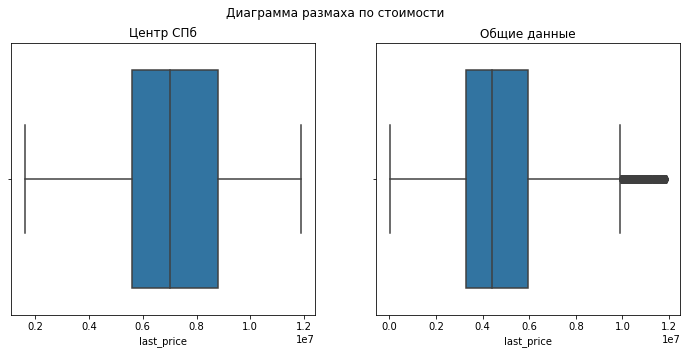

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Диаграмма размаха по стоимости')
sns.boxplot(spb_center['last_price'], orient="h", ax=axes[0])
axes[0].set_title('Центр СПб')
sns.boxplot(good_data['last_price'], orient="h", ax=axes[1])
axes[1].set_title('Общие данные')
plt.show()

#### Параметр `число комнат`

In [86]:
spb_center['rooms'].describe()

count    2655.000000
mean        2.231262
std         0.950153
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

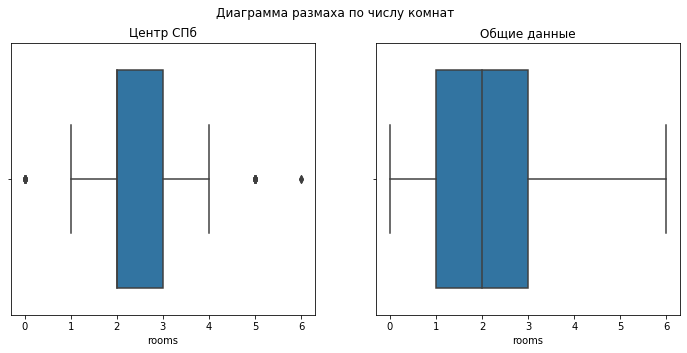

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Диаграмма размаха по числу комнат')
sns.boxplot(spb_center['rooms'], orient="h", ax=axes[0])
axes[0].set_title('Центр СПб')
sns.boxplot(good_data['rooms'], orient="h", ax=axes[1])
axes[1].set_title('Общие данные')
plt.show()

#### Параметр `высота потолков`

In [88]:
spb_center['ceiling_height'].describe()

count    2655.000000
mean        2.851386
std         0.293998
min         2.400000
25%         2.650000
50%         2.700000
75%         3.000000
max         4.000000
Name: ceiling_height, dtype: float64

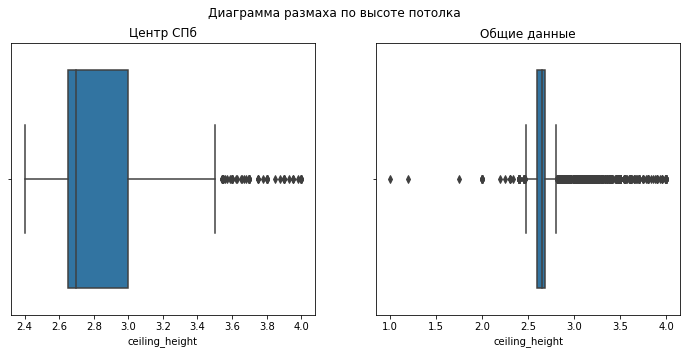

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Диаграмма размаха по высоте потолка')
sns.boxplot(spb_center['ceiling_height'], orient="h", ax=axes[0])
axes[0].set_title('Центр СПб')
sns.boxplot(good_data['ceiling_height'], orient="h", ax=axes[1])
axes[1].set_title('Общие данные')
plt.show()

#### Параметр `число комнат`

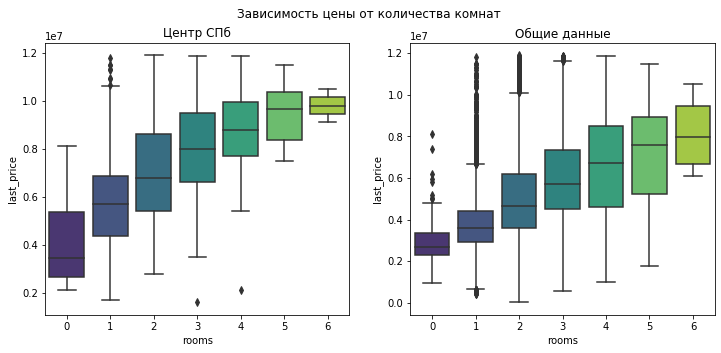

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Зависимость цены от количества комнат')
sns.boxplot(ax=axes[0], data=spb_center, x="rooms", y='last_price', palette='viridis')
axes[0].set_title('Центр СПб')
sns.boxplot(ax=axes[1], data=good_data, x="rooms", y='last_price', palette='viridis')
axes[1].set_title('Общие данные')
plt.show()

#### Параметр `этаж`

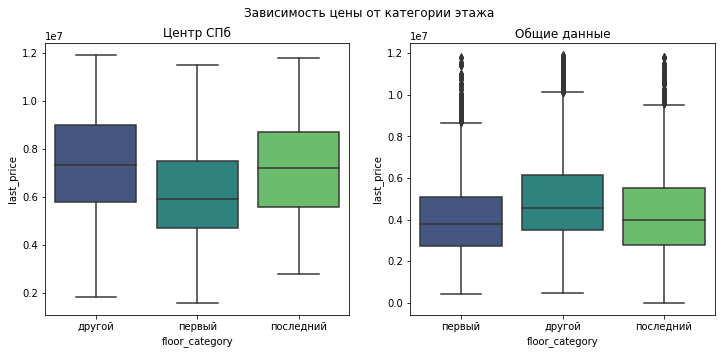

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Зависимость цены от категории этажа')
sns.boxplot(ax=axes[0], data=spb_center, x="floor_category", y='last_price', palette='viridis')
axes[0].set_title('Центр СПб')
sns.boxplot(ax=axes[1], data=good_data, x="floor_category", y='last_price', palette='viridis')
axes[1].set_title('Общие данные')
plt.show()

#### Параметр `удалённость от центра`

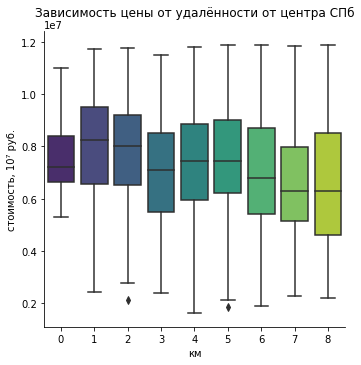

In [92]:
sns.catplot(x="center_km", y="last_price", kind="box", data=spb_center, palette='viridis')
plt.title("Зависимость цены от удалённости от центра СПб", pad=15)
plt.xlabel("км")
plt.ylabel("стоимость, 10⁷ руб.")
plt.show()

#### Параметр `дата размещения объявления`

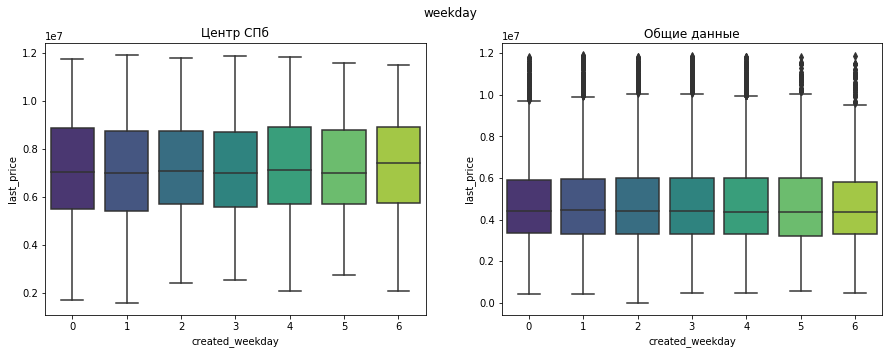

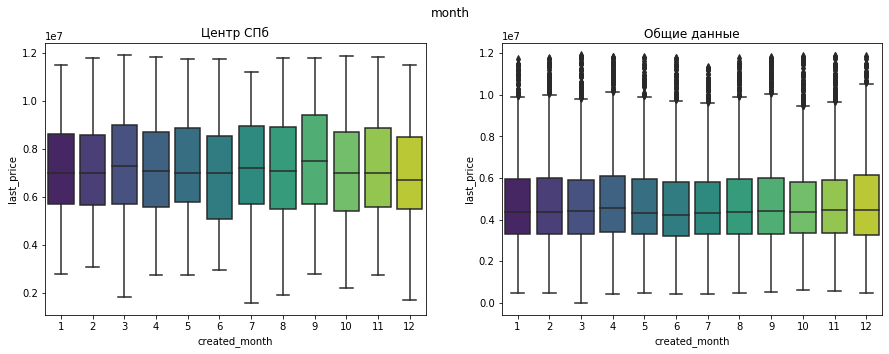

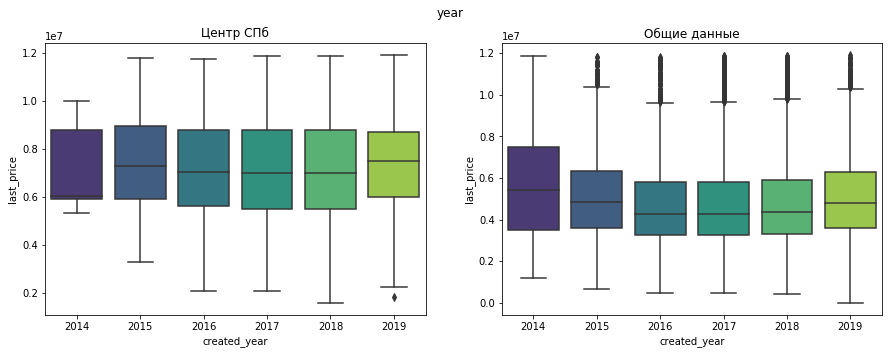

In [93]:
for column in ['created_weekday', 'created_month', 'created_year']:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(list(column.split('created_'))[1])
    sns.boxplot(ax=axes[0], data=spb_center, x=column, y='last_price', palette='viridis')
    axes[0].set_title('Центр СПб')
    sns.boxplot(ax=axes[1], data=good_data, x=column, y='last_price', palette='viridis')
    axes[1].set_title('Общие данные')

***
#### Промежуточные выводы
* Площадь квартир в центре Санкт-Петербурга существенно больше, чем в остальных районах.
* Стоимость квартир в центре Санкт-Петербурга существенно выше, чем в остальных районах.
* У квартир в центре Санкт-Петербурга в среднем на одну комнату больше, чем в остальных районах.
* Высота потолков квартир в центре Санкт-Петербурга сильно выше, чем в остальных районах.
* Зависимость цены от количества комнат более-менее одинаковая.
* Соотношения в ценах по категориям этажа тоже схожи.
* Стоимость снижается при удалении от центра.
* День недели размещения не влияет на стоимость.
* В центре Санкт-Петербурга количество объявлений в декабре меньше, чем в остальные месяцы.
* Валютный кризис 2014–2015 годов не повлиял на стоимость жилья в центре.  
   В целом стоимость квартир в центре практически не менялась за 5 лет.<br><br>
***

## Общий вывод
Основные параметры влияющие на рыночную стоимость жилья:
* Общая площадь квартиры.  
   Максимальное нормальное значение — 114,5 м².
* Расстояние до центра города.  
   Стоимость квартир, расположенных в радиусе 8 км от центра,  
   наименее подвержена воздействию внешних факторов.
* Число комнатимеет линейную зависимость по отношению к цене.  
   Чем больше комнат, тем выше стоимость.
* Квартиры в центре также более привлекательны за счёт более высоких потолков.
* Нельзя выявить линейной взаимосвязи срока продажи недвижимости и стоимости.  
   Максимальное нормальное значение — 198 дней.